Initial Plan:

Which of the major economic indicators are the most correlated with one another and what is the economic interpretation of what is happening?

Gross Domestic Product (GDP) -
Unemployment rate -
Inflation rate -
Consumer confidence -
Housing starts -
Retail sales (Heavy trucks) - 

There are also other things that we could possibly include like, inflation rate, consumer spending, credit card debt, mortgage debt, savings rate, etc... But for now we will keep it simple

My first course of action will be to load these datasets into python, clean the data using pandas, and compile all of the different datasets into one dataframe.

In [202]:
#Importing some of the libraries I know I may use off of the top of my head
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the neccessary data files.
gdp = pd.read_csv('C:/Users/Jeremy/Desktop/Project/GDP.csv')
cpi = pd.read_csv('C:/Users/Jeremy/Desktop/Project/CPI.csv')
housing_starts = pd.read_csv('C:/Users/Jeremy/Desktop/Project/HOUST.csv')
heavy_vehicle_sales = pd.read_csv('C:/Users/Jeremy/Desktop/Project/truckstarts.csv')
unemp = pd.read_csv('C:/Users/Jeremy/Desktop/Project/UNRATE.csv')

#Renaming columns so they are readable and understandable
cpi.rename(columns={'CPALTT01USQ657N':'CPI'}, inplace=True)
housing_starts.rename(columns={"HOUST":'Housing Starts'}, inplace=True)
heavy_vehicle_sales.rename(columns={"HTRUCKSSAAR":"Truck Sales"}, inplace=True)
unemp.rename(columns={'UNRATE':"Unemployment Rate"}, inplace=True)

#Since unemp dataset has data going further back than 1980, we are masking the dataframe to only show data after the specificed date
unemp = unemp[unemp['DATE'] >= '1980-01-01']


In [251]:
#Here we are merging all of the data together. Specifically on DATE (since they all have a column named 'DATE'. This helps so we dont stack the datasets one after the other, and get something that isnt workable)
merged_df = pd.merge(gdp, cpi, on='DATE')
merged_df = pd.merge(merged_df, housing_starts, on='DATE')
merged_df = pd.merge(merged_df, heavy_vehicle_sales, on='DATE')
merged_df = pd.merge(merged_df, unemp, on='DATE')

#Changing GDP to percent change so that we can better visualize its changes. Obviously GDP has gone up, but how much has it changed between reports is what we're looking for
merged_df['GDP'] = merged_df['GDP'].pct_change()
merged_df['GDP'] = merged_df['GDP'].fillna(0)

#Chaning the data so that they can be plotted on the same plot and look normal
merged_df['GDP'] = merged_df['GDP'].mul(100)
merged_df['Truck Sales'] = merged_df['Truck Sales'].mul(10)
merged_df['Housing Starts'] = merged_df['Housing Starts'].div(1000)

#Viewing our new dataframe. It looks good
merged_df

,DATE,GDP,CPI,Housing Starts,Truck Sales,Unemployment Rate
0,1980-01-01,0.000000,3.950834,1.341,3.24,6.3
1,1980-04-01,0.269191,3.673986,1.051,2.46,6.9
2,1980-07-01,2.113820,1.832994,1.269,2.83,7.8
3,1980-10-01,4.518634,2.640000,1.523,2.66,7.5
4,1981-01-01,4.643991,2.650039,1.547,2.46,7.5
...,...,...,...,...,...,...
166,2021-07-01,2.184612,1.600975,1.573,4.46,5.4
167,2021-10-01,3.391451,1.517761,1.563,4.38,4.6
168,2022-01-01,1.607282,2.283464,1.666,4.38,4.0
169,2022-04-01,2.053299,2.973833,1.805,4.56,3.6


In [100]:
#Viewing our initial data via plots, so that we can get a sense of how it looks.

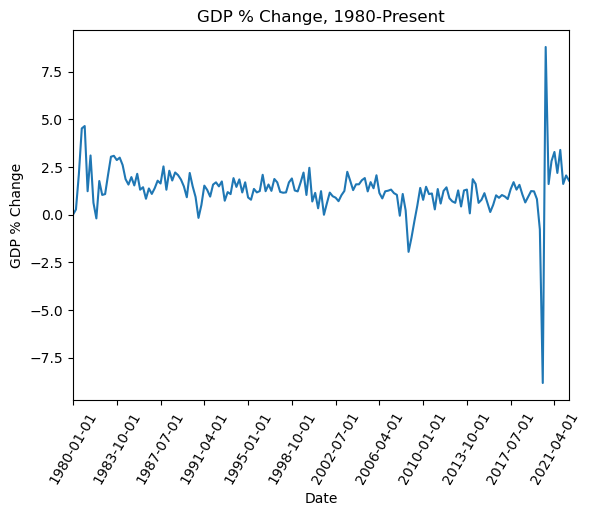

In [239]:
# Plot data and customize x-axis limits
plt.title("GDP % Change, 1980-Present")
plt.xlabel("Date")
plt.ylabel("GDP % Change")
plt.plot(merged_df['DATE'],merged_df['GDP'])
plt.xlim([min(merged_df['DATE']),max(merged_df['DATE'])]) #Takes the first date we have and the last date in the DATE column and sets as the upper and lower bound
plt.xticks(merged_df['DATE'][::15], rotation=60) #This is telling us to SKIP every 15 values in a list
plt.ioff()
plt.show()

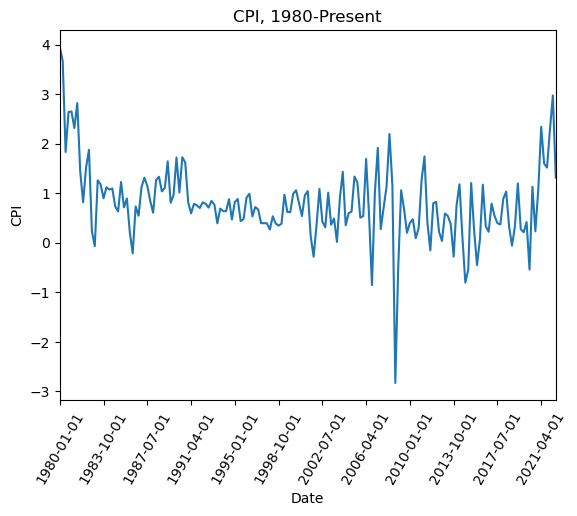

In [213]:
plt.title("CPI, 1980-Present")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.plot(merged_df['DATE'],merged_df['CPI'])
plt.xlim([min(merged_df['DATE']),max(merged_df['DATE'])])
plt.xticks(merged_df['DATE'][::15], rotation=60) #This is telling us to SKIP every 15 values in the DATE column so that we can READ the x-axis more carefully
plt.ioff()
plt.show()

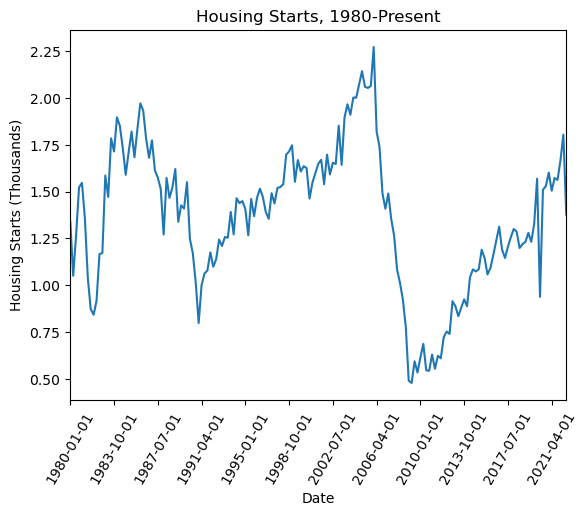

In [269]:
plt.title("Housing Starts, 1980-Present")
plt.xlabel("Date")
plt.ylabel("Housing Starts (Thousands)")
plt.plot(merged_df['DATE'],merged_df['Housing Starts'])
plt.xlim([min(merged_df['DATE']),max(merged_df['DATE'])])
plt.xticks(merged_df['DATE'][::15], rotation=60)
plt.ioff()
plt.show()

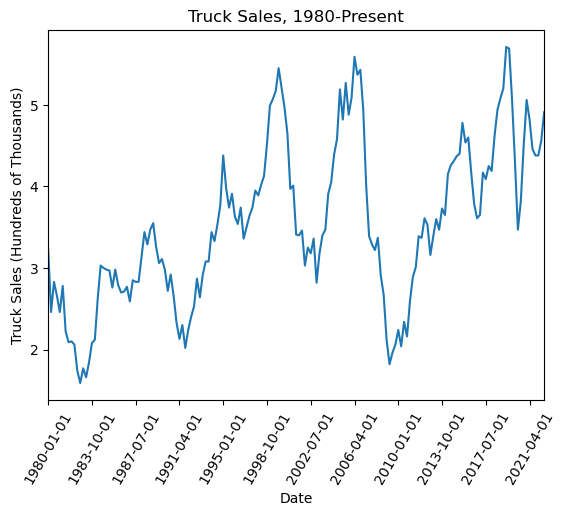

In [270]:
plt.title("Truck Sales, 1980-Present")
plt.xlabel("Date")
plt.ylabel("Truck Sales (Hundreds of Thousands)")
plt.plot(merged_df['DATE'],merged_df['Truck Sales'])
plt.xlim([min(merged_df['DATE']),max(merged_df['DATE'])])
plt.xticks(merged_df['DATE'][::15], rotation=60)
plt.ioff()
plt.show()

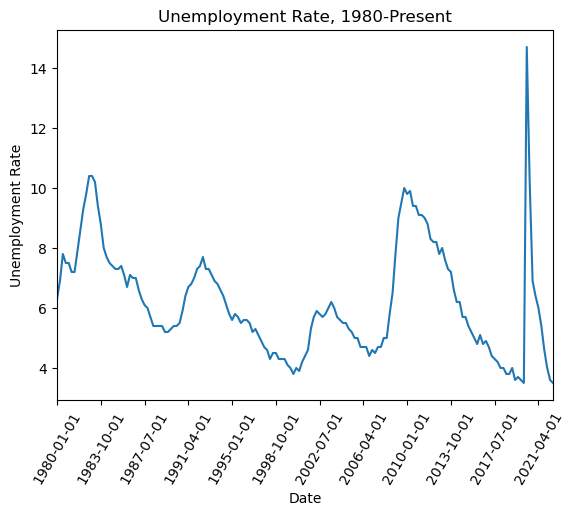

In [217]:
plt.title("Unemployment Rate, 1980-Present")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.plot(merged_df['DATE'],merged_df['Unemployment Rate'])
plt.xlim([min(merged_df['DATE']),max(merged_df['DATE'])])
plt.xticks(merged_df['DATE'][::15], rotation=60)
plt.ioff()
plt.show()

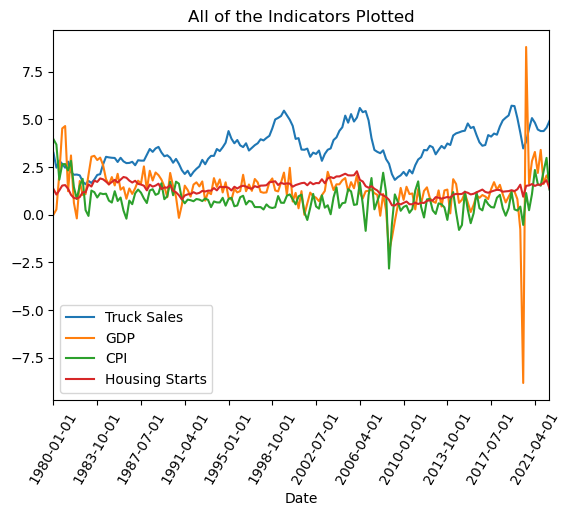

In [262]:
#Here I am plotting all of the indicators together to see how they respond during recessions, ie: 2008, 2020, etc...
plt.plot(merged_df['DATE'],merged_df['Truck Sales'], label='Truck Sales')
plt.plot(merged_df['DATE'],merged_df['GDP'], label='GDP')
plt.plot(merged_df['DATE'],merged_df['CPI'], label='CPI')
plt.plot(merged_df['DATE'],merged_df['Housing Starts'], label='Housing Starts')
plt.title("All of the Indicators Plotted")
plt.xlabel("Date")
plt.legend(loc='lower left')
plt.xlim([min(merged_df['DATE']),max(merged_df['DATE'])])
plt.xticks(merged_df['DATE'][::15], rotation=60)
plt.ioff()
plt.show()

In [218]:
#Now we will run a correlation test to see if any of the variables have a strong correlation with one another
corr = merged_df.corr(method='pearson')
corr

,GDP,CPI,Housing Starts,Truck Sales,Unemployment Rate
GDP,1.000000,0.346723,0.348055,0.017396,-0.103245
CPI,0.346723,1.000000,0.136419,-0.108089,-0.026768
Housing Starts,0.348055,0.136419,1.000000,0.356128,-0.429031
Truck Sales,0.017396,-0.108089,0.356128,1.000000,-0.715171
Unemployment Rate,-0.103245,-0.026768,-0.429031,-0.715171,1.000000


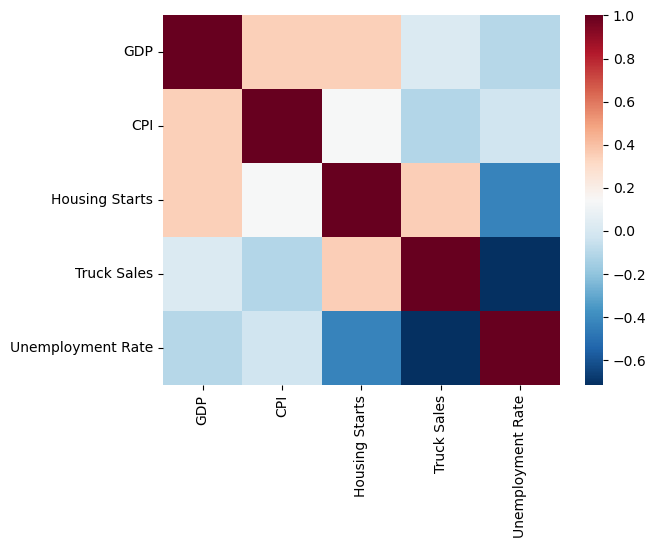

In [244]:
#Seaborn is going to give us the ability to show a heatmap of the correlations. It adds more plotting ability TO matplotlib
import seaborn as sns

#Plotting the heatmap
sns.heatmap(corr, cmap="RdBu_r")
plt.show()

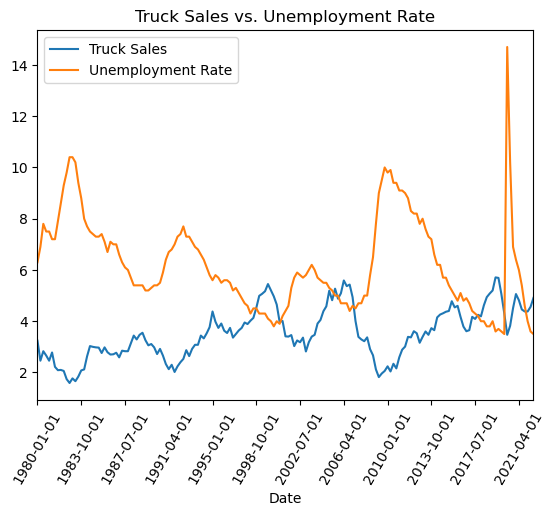

In [267]:
#Plotting the indicators that are most correlated with one another
plt.plot(merged_df['DATE'],merged_df['Truck Sales'], label='Truck Sales')
plt.plot(merged_df['DATE'],merged_df['Unemployment Rate'], label='Unemployment Rate')
plt.title("Truck Sales vs. Unemployment Rate")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xlim([min(merged_df['DATE']),max(merged_df['DATE'])])
plt.xticks(merged_df['DATE'][::15], rotation=60)
plt.ioff()
plt.show()

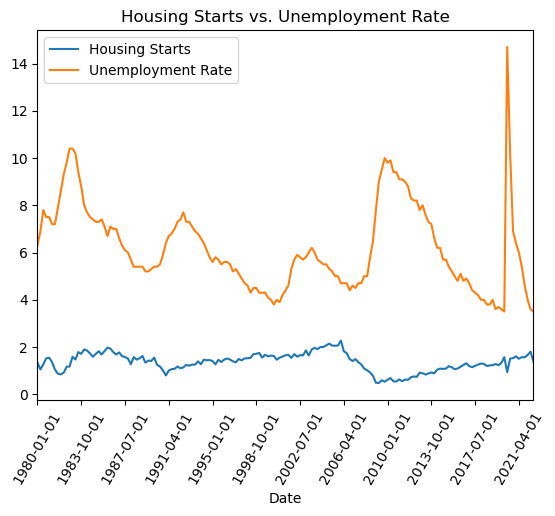

In [268]:
plt.plot(merged_df['DATE'],merged_df['Housing Starts'], label='Housing Starts')
plt.plot(merged_df['DATE'],merged_df['Unemployment Rate'], label='Unemployment Rate')
plt.title("Housing Starts vs. Unemployment Rate")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xlim([min(merged_df['DATE']),max(merged_df['DATE'])])
plt.xticks(merged_df['DATE'][::15], rotation=60)
plt.ioff()
plt.show()

Things to consider:
Target GDP: 2-3%
Target Inflation: 2%
Target unemployment: 4%

In [272]:
gdp_mean = merged_df["GDP"].mean()
inflation_mean = merged_df["CPI"].mean()
housing_mean = merged_df["Housing Starts"].mean()
truck_mean = merged_df["Truck Sales"].mean()
unemp_mean = merged_df["Unemployment Rate"].mean()
print("GDP Mean (% Change)",gdp_mean)
print("CPI Mean",inflation_mean)
print("Housing Starts Mean", housing_mean)
print("Trucking Sales Mean", truck_mean)
print("Unemployment Mean", unemp_mean)

GDP Mean (% Change) 1.3151630699702717
CPI Mean 0.8025556251783504
Housing Starts Mean 1.3618654970760242
Trucking Sales Mean 3.5218713450292403
Unemployment Mean 6.2058479532163755
